In [1]:
import ase
import numpy as np
import matplotlib.pyplot as plt
from mods import coulombmat_eigenvalues_from_coords
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
def all_metric(y_true, y_pred):
    print("RMSE = ", mean_squared_error(y_true, y_pred, squared=False))
    print("MAE = ", mean_absolute_error(y_true, y_pred))

    plt.figure(figsize=(6,6))
    plt.scatter(y_true, y_pred, c='crimson')
    # plt.yscale('log')
    # plt.xscale('log')

    p1 = max(max(y_pred), max(y_true))
    p2 = min(min(y_pred), min(y_true))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    plt.show()

In [3]:
valid_db = np.load("data/valid.npz", allow_pickle=True)
test_db = np.load("data/test.npz", allow_pickle=True)
train_db = np.load("data/train.npz", allow_pickle=True)

In [6]:
len(test_db["U0"])

13083

In [4]:
all_data = {"va_db":valid_db, "te_db":test_db, "ta_db":train_db}
energy = {}
coor = {}
atom_number = {}
atom_counts = {}
for k, v in all_data.items():
    energy[k] = v["U0"]
    coor[k] = v["positions"]
    atom_number[k] = v["charges"]
    atom_counts[k] = v["num_atoms"]

In [6]:
# coul_mat = []
# for i in range(len(energy["te_db"])):
#     coul_mat.append(coulombmat_eigenvalues_from_coords(atom_types=atom_number["te_db"][i,:atom_counts["te_db"][i]],
#                                                        coords=coor["te_db"][i,:atom_counts["te_db"][i]],
#                                                        padded_size=29))
# np.save("test_coul_smat.npy", np.array(coul_mat))

In [6]:
# np.save("coul_mat.npy", np.array(coul_mat))

In [7]:
train_coul_mat = np.load("train_coul_mat.npy")
test_coul_mat = np.load("test_coul_smat.npy")
valid_coul_mat = np.load("valid_coul_smat.npy")

In [8]:
krr = KernelRidge(alpha=1.0)

In [9]:
krr.fit(valid_coul_mat, energy["va_db"])

KernelRidge(alpha=1.0)

RMSE =  0.33987700989608655
MAE =  0.22460826450884944


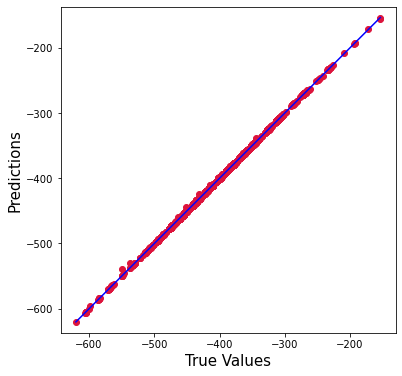

In [18]:
pred = krr.predict(test_coul_mat)
all_metric(energy["te_db"], pred)

In [15]:
regr = RandomForestRegressor(n_estimators=200, max_depth=50, random_state=0)
regr.fit(valid_coul_mat, energy["va_db"])

RandomForestRegressor(max_depth=50, n_estimators=200, random_state=0)

RMSE =  3.8722227409965533
MAE =  2.406344755875866


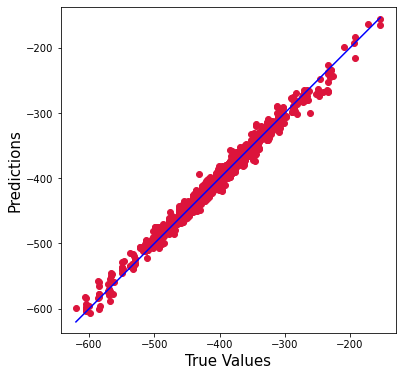

In [19]:
pred = regr.predict(test_coul_mat)
all_metric(energy["te_db"], pred)

In [23]:
clf = Ridge(alpha=1.0)
clf.fit(valid_coul_mat, energy["va_db"])

Ridge()

RMSE =  0.16810325949358354
MAE =  0.10748566105746922


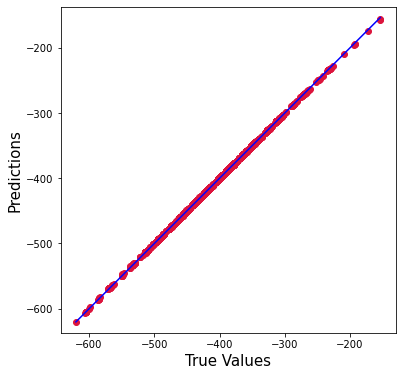

In [24]:
pred = clf.predict(test_coul_mat)
all_metric(energy["te_db"], pred)

RMSE =  0.2966579636600482
MAE =  0.23316370298051906


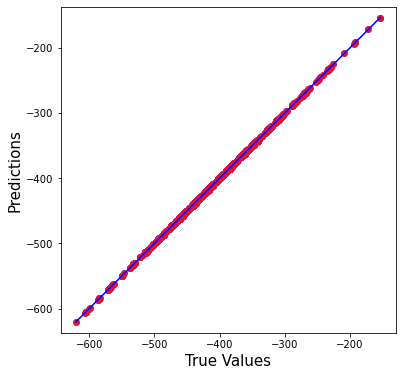

In [8]:
krr = KernelRidge(alpha=1.0)
krr.fit(valid_coul_mat, energy["va_db"])
pred = krr.predict(test_coul_mat)
all_metric(energy["te_db"], pred)

RMSE =  0.1607970353094283
MAE =  0.11392235681800217


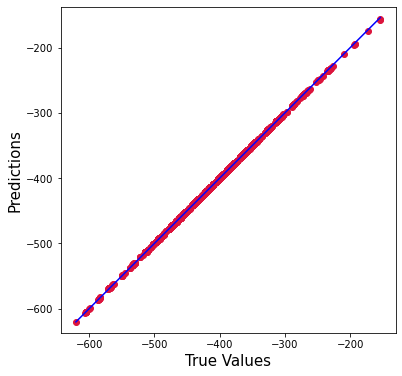

In [9]:
clf = Ridge(alpha=1.0)
clf.fit(valid_coul_mat, energy["va_db"])
pred = clf.predict(test_coul_mat)
all_metric(energy["te_db"], pred)

RMSE =  3.6233348842760713
MAE =  2.2089763908995623


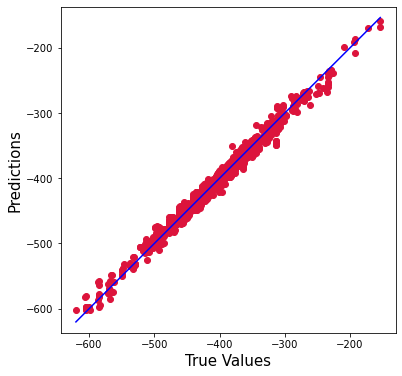

In [10]:
regr = RandomForestRegressor(n_estimators=200, max_depth=50, random_state=0)
regr.fit(valid_coul_mat, energy["va_db"])
pred = regr.predict(test_coul_mat)
all_metric(energy["te_db"], pred)

RMSE =  0.16420253393820267
MAE =  0.11936987455802132


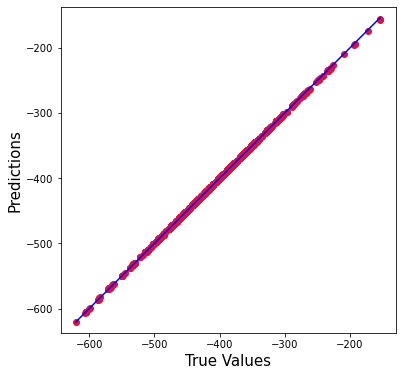

In [14]:
clf = Ridge(alpha=10)
clf.fit(valid_coul_mat, energy["va_db"])
pred = clf.predict(test_coul_mat)
all_metric(energy["te_db"], pred)